In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import datetime as dt

%matplotlib inline


plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

# En este notbook se encuentra: 
    -Parte 3: Relación entre eventos
    

In [3]:
tf = pd.read_csv('./data/events.csv',dtype=object)

In [3]:
# Agregamos nuevas columnas para trabajar mejor con el tiempo. (mes, dia, dia del año)
tf['timestamp_datetime'] = pd.to_datetime(tf['timestamp'])
tf['timestamp_month'] = tf['timestamp_datetime'].dt.month
tf['timestamp_day'] = tf['timestamp_datetime'].dt.day
tf['timestamp_weekday'] = tf['timestamp_datetime'].dt.weekday_name
tf['timestamp_dayofyear'] = tf['timestamp_datetime'].dt.dayofyear
tf['timestamp_hour'] = tf['timestamp_datetime'].dt.hour
tf['timestamp_minute'] = tf['timestamp_datetime'].dt.minute

In [403]:
viewed_product = tf[tf['event'] == 'viewed product']
brand_listing    = tf[tf['event'] == 'brand listing']
visited_site =  tf[tf['event'] == 'visited site']
ad_campaign_hit = tf[tf['event'] == 'ad campaign hit']
generic_listing = tf[tf['event'] == 'generic listing']
searched_products = tf[tf['event'] == 'searched products']
search_engine_hit = tf[tf['event'] == 'search engine hit']
checkout = tf[tf['event'] == 'checkout']
staticpage = tf[tf['event'] == 'staticpage']
conversion = tf[tf['event'] == 'conversion']
lead = tf[tf['event'] == 'lead']

In [4]:
rel_event = tf.groupby('event').agg(lambda x: x.isnull().sum()).T
rel_event

event,ad campaign hit,brand listing,checkout,conversion,generic listing,lead,search engine hit,searched products,staticpage,viewed product,visited site
timestamp,0,0,0,0,0,0,0,0,0,0,0
person,0,0,0,0,0,0,0,0,0,0,0
url,71,98635,33735,1172,67534,448,50957,56073,3598,528931,87378
sku,82827,98635,0,0,67534,448,50957,56073,3598,0,87378
model,82827,98635,2,0,67534,0,50957,56073,3598,0,87378
condition,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
storage,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
color,82827,98635,2,0,67534,448,50957,56073,3598,0,87378
skus,82827,311,33735,1172,113,448,50957,119,3598,528931,87378
search_term,82827,98635,33735,1172,67534,448,50957,7106,3598,528931,87378


**Los campos obligatorios son: **


(los eventos hora mes y nombre de dia son comunes a todos porque timestamp es comun a todos y todos los timestamp tiene información en el formato correcto)


Para el evento **viewed product**: timestamp | person | sku | model | condition | storage | color.

Para el evento **brand listing**: timestamp | person | skus -> **analizar los 311 skus null**

Para el evento **visited site**: channel | new_vs_returning | city | region | country | device_tipe | screen resolution | operating system version | browser version

Para el evento **ad campaing hit**: timestap | person | url | campaing_sourse -> **analizar que sucede con los 71 null que aparecen url , y los 31 que aparecen en campaing_source y eliminarlos si no sirve**

Para el evento **generic listing**: timestamp | person | skus ->**analizar que sucede con los 113 null que aparecen en skus**

Para el evento **serched product**: timestamp | person | skus | search_term -> **analizar que sucede con los 119 null que aparecen skus y 7106 null que aparecen en search_term**

Para el evento **serched engine**: timestamp | person | search engine

Para el evento **checked out**: timestamp | person | sku | color | storage | model | condition -> **analizar que sucede con los 2 null que aparecen en: color, storage, model, condition**

Para el evento **static page**: timestamp | person | satatic page

Para le evento **conversion**: timestamp | person | sku | model | color | condition | storage

Para el evento **lead**: timestamp | person | model

Esto lo deducimos porque si la cantidad de apariciones de cada evento es igual a la cantidad de nulls que tiene en una columna -> esa columna no representa nada para el evento. 

# 3) Relaciones entre eventos

** 3.1) ¿Qué relación existe entre el numero de compras de un usuario y las visitas a los productos? ** 

Text(0.5,1,'Relacion de la cantidad de clicks en campañas con visitas y compras de productos')

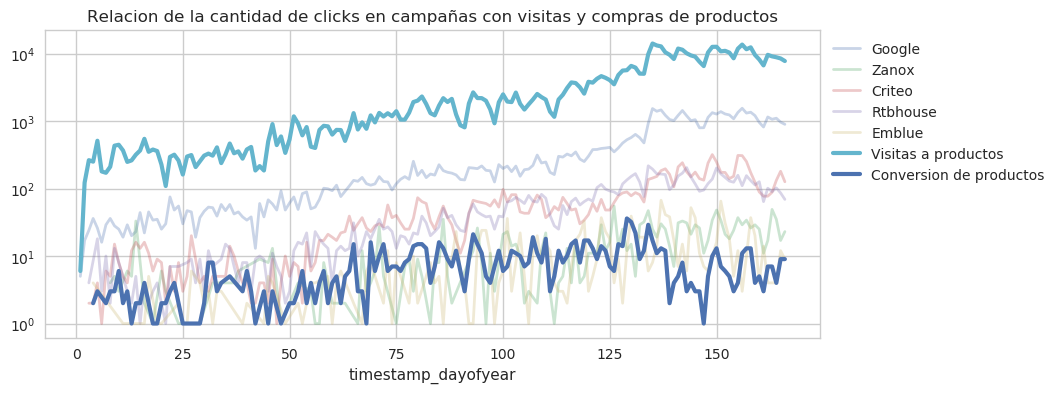

In [70]:
# Ademas podemos ver si existe algun tipo de relacion entre los clicks en la campañas publicitarias
# y las visitas y compras de los productos.

(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(10,4),label = 'Google',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Zanox',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Criteo',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Rtbhouse',alpha = 0.3)
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2, label = 'Emblue',alpha = 0.3)
viewed_product.groupby('timestamp_dayofyear').count().loc[:,'event'].plot(logy = True, linewidth=3\
                                                                          ,label = 'Visitas a productos')
trocafone.loc[trocafone['event'] == 'conversion'].groupby('timestamp_dayofyear').count().loc[:,'event']\
                                                .plot(linewidth=3,label = 'Conversion de productos')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.title('Relacion de la cantidad de clicks en campañas con visitas y compras de productos')


Podemos ver que a medida que aumentan los clicks en las campañas publicitarias, tambien
lo hacen las visitas a productos, lo cual es logico. Algo quizas no tan esperado es que aunque aumentan
las visitas y los clicks en las publicidades, las conversiones no parecen aumentar. En la primer mitad podemos
ver que era mas baja la cantidad de conversiones, pero luego distingimos que estas se mantienen aroximadamente 
constantes a pesar del incremento en las visitas.

In [178]:
person_event = tf.filter(items=['person', 'event'])
person_event['cant'] = 1
person_event = person_event.loc[(person_event['event'] == 'conversion') | (person_event['event'] == 'viewed product')]

person_conv = person_event.groupby(['person', 'event']).agg({'cant': 'sum'}).unstack()
person_conv = person_conv.loc[(person_conv['cant']['conversion'].notnull()) & (person_conv['cant']['conversion'] != 0)]

In [103]:
# Cambio nombre columnas
person_conv.columns = ['conversion', 'viewed product']
person_conv.head()

,conversion,viewed product
person,,
00204059,1.00,44.00
00c13dee,1.00,17.00
00fdbb4b,1.00,3.00
0146a9df,1.00,23.00
01db2fe6,1.00,67.00


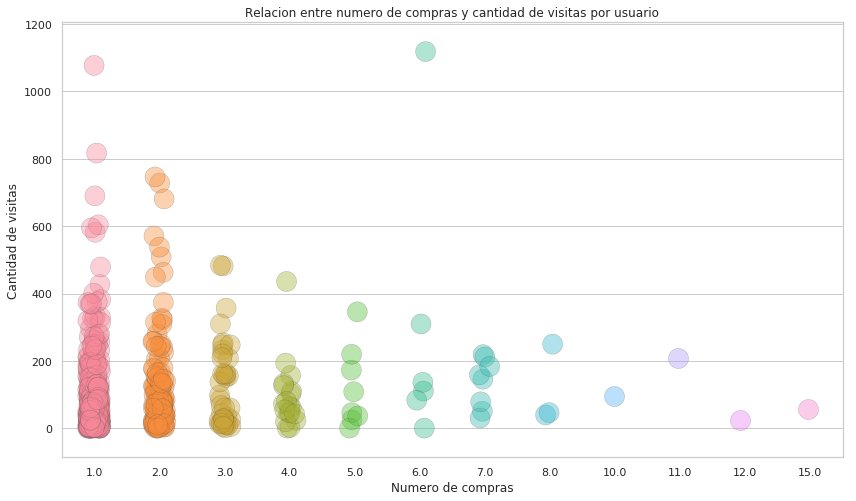

In [106]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)

dx = sns.stripplot(x="conversion", y="viewed product", data=person_conv,\
                   jitter=True, linewidth=0.4, alpha=.4, marker=".", size=40, ax=ax)

dx.set(xlabel='Numero de compras', ylabel='Cantidad de visitas', \
       title='Relacion entre numero de compras y cantidad de visitas por usuario');


Cada punto es un cliente (identificado a partir de la columna 'person') que posee una cantidad total de visitas al sitio (cantidad de eventos 'viewed product') y un numero total de compras (cantidad de eventos 'conversion').

**3.2) ¿Los usuarios realizan la conversión y el checkout desde el mismo dispositivo? **

In [205]:
#LE AGREGO AL CHECK OUT EL DISPOSITIVO DESDE DONDE LO HICIERON
#visited_site = visited_site.drop_duplicates()
#usuarios =  tf.loc[:,['event', 'person', 'device_type','sku','timestamp_datetime','timestamp_minute','timestamp_hour'\
                    #  ,'timestamp_day','timestamp_month']]

#VOY A TRABAJAR CON 3 EVENTOS:
#visited_site = usuarios[usuarios.event == 'visited site'].loc[:,['event','timestamp_datetime','person','device_type',\
                                                                'timestamp_minute','timestamp_hour'\
                    #  ,'timestamp_day','timestamp_month']]

#checkout = usuarios[usuarios.event == 'checkout'].loc[:,['event','timestamp_datetime','person','sku',\
                                                        'timestamp_minute','timestamp_hour'\
                    #  ,'timestamp_day','timestamp_month']]

#conversion = usuarios[usuarios.event == 'conversion'].loc[:,['event','timestamp_datetime','person','sku',\
                                                             'timestamp_minute','timestamp_hour'\
                   #   ,'timestamp_day','timestamp_month']]

**Importante: Existe un único visited site por acceso a la página. Es decir que:**
    
    -Se realiza un visited site: 
    -Se realizan todos lo checkouts y conversiones respectivos a ese acceso
    -No necesariamente hay un checkout por conversion. 

In [55]:
def contar_columnas(x):#(col1,col2,col3,col4):
    t=0
    if x['tablet']>0:
        t += 1
    if x['smartphone']>0:
        t += 1
    if x['computer']>0:
        t += 1
    if x['unknown']>0:
        t += 1
    return t

visited_site = tf[tf.event == 'visited site']
#print(visited_site.device_type.value_counts()) -> LOS UNKNOWN SON DESPRECIABLES. 
visited_site = visited_site.groupby('person')['device_type'].value_counts().to_frame('cantidad')
visited_site = visited_site.unstack().fillna(0).reset_index()
visited_site.columns = ['person','computer','smartphone','tablet','unknown']
visited_site = visited_site.set_index('person')
visited_site['porcentaje'] = visited_site.apply(lambda p:contar_columnas(p), axis = 1)


visited_site['porcentaje'].value_counts(normalize = True).to_frame()


,porcentaje
1,0.98
2,0.02
3,0.00


EL 98% de las personas se conecta siempre del mismo dispositivo. Como la mayor cantidad de usuarios se conecta desde el mismo dispositivo despreciaremos el 2% que no lo hace y evaluaremos la cantidad de compras que se realizan en base al dispositivo. 

In [78]:
persona = tf[['person','event','country','city','region','device_type','screen_resolution']]
persona = persona[persona['event'] == 'visited site']
persona = persona.drop_duplicates('person')


checkout = tf[tf.event == 'checkout']
checkout = checkout[['sku','person','model']]

conversion = tf[tf.event == 'conversion']
conversion = conversion[['sku','person','model']]

persona_conversion = pd.merge(conversion, persona, on =['person'], how = 'left')
persona_check = pd.merge(checkout, persona, on =['person'], how = 'left')


print(persona_conversion.device_type.value_counts(normalize = True)*100)
print(persona_check.device_type.value_counts(normalize = True)*100)


tf.event.value_counts()

Computer      572
Smartphone    496
Tablet          5
Unknown         1
Name: device_type, dtype: int64
Smartphone    17148
Computer      15259
Tablet          547
Unknown          45
Name: device_type, dtype: int64


viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [224]:
#LE AGREGO A LA CONVERSION EL DISPOSITIVO DESDE DONDE LO HICIERON
#Por cada conversión existe un único visited site anterior. 



#conversion = conversion.drop_duplicates()
conversion_con_dispositivo = pd.merge(conversion, visited_site, on =  ['timestamp_hour'\
                      ,'timestamp_day','timestamp_month','person'],\
                                     how = 'inner')

#¿VALE LA PENA DROPPEAR LOS DUPLICADOS? -> RESPUESTA: no!
print(conversion_con_dispositivo['event_x'].value_counts())
tf['event'].value_counts()
#conversion_con_dispositivo

conversion    686
Name: event_x, dtype: int64


viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [227]:
#print(checkout_con_dispositivo.head())
#print(conversion_con_dispositivo.head())



#AHORA UNO SEGÚN PERSONA Y SKU PARA ASEGURARME QUE SE TRATA DE LA MISMA TRANSACCIÓN
conversion_checkout = pd.merge(conversion_con_dispositivo, checkout_con_dispositivo, on=['person','sku'],\
                               how = 'inner')

#print(conversion_checkout.head())
#conversion_checkout
#¿VALE LA PENA DROPPEAR LOS DUPLICADOS? -> RESPUESTA: no!
#conversion_checkout = conversion_checkout.loc[:,['event_x_x','person','sku','event_x_y']]
#print(conversion_checkout['event_x_x'].value_counts())
#tf['event'].value_counts()



In [228]:
#AHORA ME FIJO CUANTOS LO HICIERON DESDE EL MISMO DISPOSITIVO

conversion_checkout['mismo_dispo'] = conversion_checkout['device_type_x'] ==\
                                                        conversion_checkout['device_type_y']

conversion_checkout['mismo_dispo'].value_counts()

True     1315
False      88
Name: mismo_dispo, dtype: int64

In [ ]:
ad_campaign_hit = tf.loc[:,['event','person','timestamp_hour','timestamp_day','timestamp_month']]
ad_campaign_hit = ad_campaign_hit[ad_campaign_hit['event'] == 'ad campaign hit']

checkout_con_campaign = pd.merge(checkout, ad_campaign_hit,on = ['timestamp_hour',\
                                                                 'timestamp_month',\
                                                                 'timestamp_day','person'],\
                                    how = 'inner').drop_duplicates()

In [251]:
conversiones = tf[tf.event == 'conversion']
usuarios = conversiones.person.value_counts()
usuarios
#252adec6 / d170f805     1
#chabon = tf[tf.person == '252adec6' ]
#chabon.sort_values('timestamp_datetime')

252adec6    15
4200bdee    12
a0d4baef    11
ba325a6b    10
a96e304b     8
d12fbe38     8
f646efa2     8
48d14aeb     7
e883f03a     7
a925072a     7
a7713c81     7
2925e132     7
baa40260     7
19b38ba2     7
f3a682fb     7
2a3a0a61     6
d38f5851     6
6b07be7b     6
0ee60361     6
1072db20     6
c710d09e     6
495d695d     5
65593b4e     5
d5c2bfeb     5
15305691     5
9417a49e     5
744ebcad     5
92003bbc     5
8316b68e     5
41c8eebd     5
            ..
e0b4e49b     1
330a22f4     1
94556a15     1
cd2c579e     1
7857fc63     1
959c0b7e     1
9a7f950e     1
e5022675     1
97946514     1
c0aabbb2     1
6e8e0307     1
7697517f     1
befc5a0e     1
73e21b6d     1
a570e8cb     1
cf839049     1
0b2bff0b     1
6e298b06     1
9da20a11     1
4761f7d0     1
75c13d4c     1
85ca6b89     1
75e2c82d     1
6e68b45e     1
ff6775d7     1
01db2fe6     1
f8966399     1
14b57502     1
6fd10554     1
d170f805     1
Name: person, Length: 716, dtype: int64

---

**3.3)¿Cuantos usuarios regresan 'x' cantidad de veces al sitio?

In [1]:
# En realidad es analisis entre columnas

In [4]:
new_vs_returning = tf.filter(items=['person', 'new_vs_returning'])


# Podemos considerar que todos los valores nulos son registros de usuarios que regresan al sitio ('Returning').
# Luego descartaremos los usuarios que no tienen ningun registro de haber ingresado al sitio por primera vez ('New').

new_vs_returning.fillna({'new_vs_returning': 'Returning'}, inplace=True)

new_vs_returning = new_vs_returning.groupby(['person'])['new_vs_returning'].value_counts(dropna=False)

In [5]:
# Construyo un DataFrame
new_vs_returning_df = new_vs_returning.unstack()
new_vs_returning_df.head()

new_vs_returning,New,Returning
person,,
0004b0a2,1.00,3.00
0006a21a,1.00,3.00
000a54b2,1.00,36.00
00184bf9,1.00,50.00
0019c395,1.00,7.00


In [6]:
# Elimino los usuarios que no fueron detectados por primera vez:
new_vs_returning_df.dropna(inplace=True)

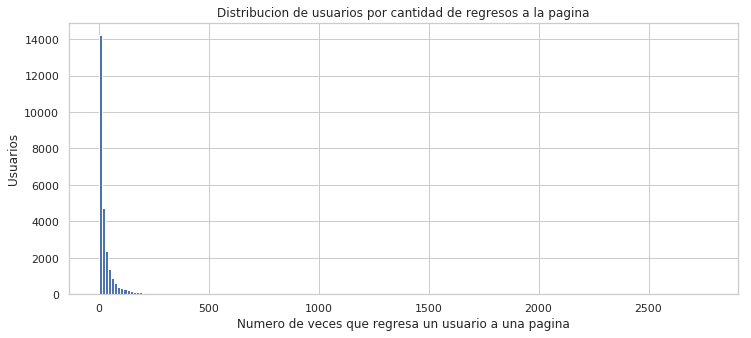

In [7]:
#Si tomamos Todos los valores registrados:

fig, ax = plt.subplots(figsize=(12, 5))

x = new_vs_returning_df['Returning']
g = ax.hist(x, bins=200);

plt.xlabel('Numero de veces que regresa un usuario a una pagina')
plt.ylabel('Usuarios')
plt.title('Distribucion de usuarios por cantidad de regresos a la pagina');

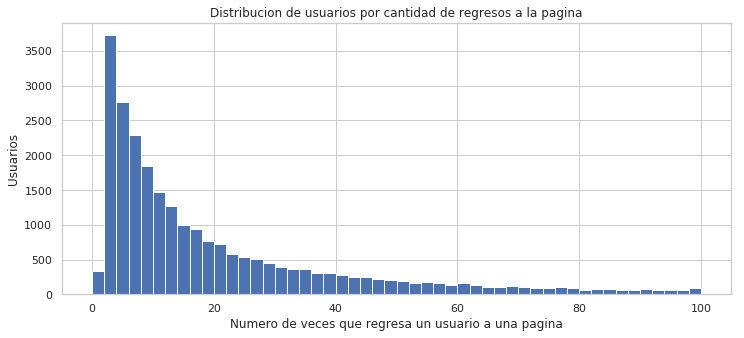

In [8]:
# Restringiendo los valores para una mejor visualizacion y mas especifica:

fig, axs = plt.subplots(figsize=(12, 5))

x = new_vs_returning_df['Returning']
axs.hist(x, bins=50, range=(0,100));

plt.xlabel('Numero de veces que regresa un usuario a una pagina')
plt.ylabel('Usuarios')
plt.title('Distribucion de usuarios por cantidad de regresos a la pagina');

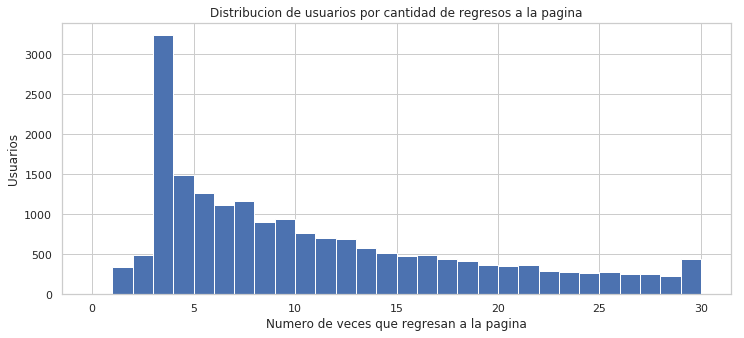

In [9]:
fig, axs = plt.subplots(figsize=(12, 5))

axs.hist(x, bins=30, range=(0,30), label='cfds');

plt.xlabel('Numero de veces que regresan a la pagina')
plt.ylabel('Usuarios')
plt.title('Distribucion de usuarios por cantidad de regresos a la pagina');

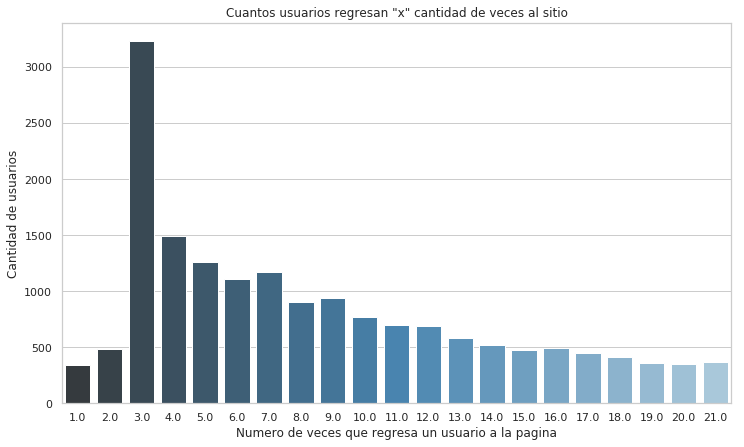

In [10]:
# Grafico de barras para ver detalladamente cuantas veces regresa al sitio la mayoria de los usuarios

fig, ax = plt.subplots(figsize=(12,7))

nums = range(1, 24)

relacion = new_vs_returning_df['Returning'].value_counts(sort=True).head(21)

g = sns.barplot(x=relacion.index, y=relacion.values, palette="Blues_d", orient='v', ax=ax)

g.set(xlabel='Numero de veces que regresa un usuario a la pagina', ylabel='Cantidad de usuarios',\
    title='Cuantos usuarios regresan "x" cantidad de veces al sitio');

#

### ¿Qué campaña de marketing es mas "eficiente"?

#### ¿Qué porcentaje de los usuarios que entra al sitio a traves de una campaña compran uno o más productos?

In [11]:
persons_campaign_event = tf.filter(items=['person', 'event', 'campaign_source'])

person_campaigns = persons_campaign_event.groupby(['person'])['campaign_source'].value_counts()
person_events = persons_campaign_event.groupby(['person'])['event'].value_counts()

person_campaigns.head()

person    campaign_source
0004b0a2  criteo             1
0006a21a  criteo             1
000a54b2  google             2
0019c395  google             2
001bb7eb  google             1
Name: campaign_source, dtype: int64

In [12]:
person_events.head()

person    event          
0004b0a2  ad campaign hit    1
          checkout           1
          viewed product     1
          visited site       1
0006a21a  ad campaign hit    1
Name: event, dtype: int64

In [13]:
# Creacion de Dataframe de eventos agrupados por personas
person_events_df = person_events.to_frame()
person_events_df.columns = ['cantidad evento']
person_events_df.reset_index(inplace=True)
person_events_df.set_index('person', inplace=True)
person_events_df.head()

,event,cantidad evento
person,,
0004b0a2,ad campaign hit,1
0004b0a2,checkout,1
0004b0a2,viewed product,1
0004b0a2,visited site,1
0006a21a,ad campaign hit,1


In [14]:
# Filtro los que tienen compras:
person_events_df = person_events_df.loc[person_events_df['event'] == 'conversion']

In [15]:
person_campaigns_df = person_campaigns.to_frame()

person_campaigns_df.columns = ['cantidad ingresos']
person_campaigns_df.reset_index(inplace=True)
person_campaigns_df.set_index('person', inplace=True)

person_campaigns_df.head()

,campaign_source,cantidad ingresos
person,,
0004b0a2,criteo,1
0006a21a,criteo,1
000a54b2,google,2
0019c395,google,2
001bb7eb,google,1


In [18]:
# Hago un join: dejo a los usuarios que tienen una o mas compras
# Obtengo los usuarios que tienen una o mas compras y entraron alguna vez al sitio por una campaña de marketing

campaing_conversion = pd.merge(person_campaigns_df, person_events_df, on='person', how='right')
campaing_conversion.head()

,campaign_source,cantidad ingresos,event,cantidad evento
person,,,,
00204059,zanox,4.00,conversion,1
00204059,FacebookAds,1.00,conversion,1
00204059,google,1.00,conversion,1
00c13dee,google,1.00,conversion,1
00c13dee,zanox,1.00,conversion,1


In [40]:
# Cantidad de compras de usuarios por campaña:

compras_por_campaing = campaing_conversion.groupby('campaign_source')['event'].value_counts()
compras_por_campaing_df = compras_por_campaing.to_frame()
compras_por_campaing_df.columns = ['cantidad compradores']
compras_por_campaing_df.reset_index(inplace=True)
compras_por_campaing_df = compras_por_campaing_df.filter(items =['campaign_source', 'cantidad compradores'])
compras_por_campaing_df.head()

,campaign_source,cantidad compradores
0,Facebook,5
1,FacebookAds,28
2,FacebookSocial,1
3,afilio,30
4,bing,28


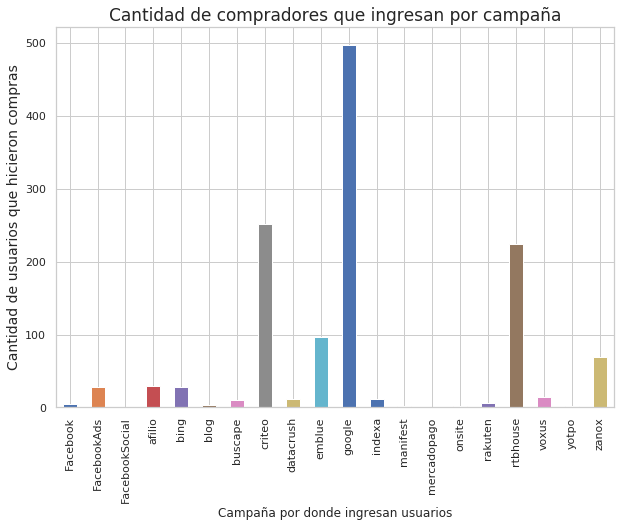

In [41]:
compras_por_campaing_df.plot(kind='bar', x='campaign_source', y='cantidad compradores', legend=False, figsize=(10,7))
plt.ylabel('Cantidad de usuarios que hicieron compras', fontsize=14)
plt.xlabel('Campaña por donde ingresan usuarios');
plt.title('Cantidad de compradores que ingresan por campaña', fontsize=17);

Se podria ver el porcentaje de estos numeros con respecto al total de usuarios por campaña para poder hacer una mejor comparacion.

A la hora de la comparacion tambien se debe tener en cuenta la cantidad total de usuarios que ingresan al sitio por campaña, lo cual ya ha sido analizado anteriormente.


In [42]:
# ---

#Busco la cantidad total de usuarios que entraron al sitio por cada campaña al menos una vez

person_campaign =tf.filter(items=['person', 'event', 'campaign_source']).loc[tf['event'] == 'ad campaign hit']
person_campaign = person_campaign.drop_duplicates()
person_campaign.head()

,person,event,campaign_source
0,0004b0a2,ad campaign hit,criteo
6,0006a21a,ad campaign hit,criteo
11,000a54b2,ad campaign hit,google
99,0019c395,ad campaign hit,google
107,001bb7eb,ad campaign hit,google


In [43]:
person_campaign_count = person_campaign.groupby('person')['campaign_source'].value_counts()
person_campaign_count_df = person_campaign_count.to_frame()
person_campaign_count_df.columns = ['cant']
person_campaign_count_df.reset_index(inplace=True)
person_campaign_count_df.set_index('person', inplace=True)
person_campaign_count_df.head()

,campaign_source,cant
person,,
0004b0a2,criteo,1
0006a21a,criteo,1
000a54b2,google,1
0019c395,google,1
001bb7eb,google,1


In [44]:
cantidad_persons_campaign = person_campaign_count_df['campaign_source'].value_counts().to_frame()
cantidad_persons_campaign.columns = ['cantidad total']
cantidad_persons_campaign.reset_index(inplace=True)
cantidad_persons_campaign.columns = ['campaign_source', 'cantidad total']
cantidad_persons_campaign.set_index('campaign_source', inplace=True)
cantidad_persons_campaign.head()

,cantidad total
campaign_source,
google,17372
criteo,4672
rtbhouse,2241
zanox,572
FacebookAds,407


In [45]:
# Hago un join:
# Obtengo la cantidad de usuarios que entraron al sitio por campaña y la cantidad de los usuarios que alguna vez compraron 

# Filtro solo los primeros 10 con mayor cantidad total de usuarios para una mejor comparacion y no ver datos irrelevantes

campaign_total_vs_compras = pd.merge(cantidad_persons_campaign.head(10), compras_por_campaing_df, on='campaign_source', how='left')
campaign_total_vs_compras['porcentaje'] = (campaign_total_vs_compras['cantidad compradores'] / campaign_total_vs_compras['cantidad total']) * 100
campaign_total_vs_compras


,campaign_source,cantidad total,cantidad compradores,porcentaje
0,google,17372,497,2.86
1,criteo,4672,251,5.37
2,rtbhouse,2241,224,10.00
3,zanox,572,69,12.06
4,FacebookAds,407,28,6.88
5,emblue,384,97,25.26
6,voxus,344,14,4.07
7,afilio,272,30,11.03
8,bing,228,28,12.28
9,rakuten,97,6,6.19


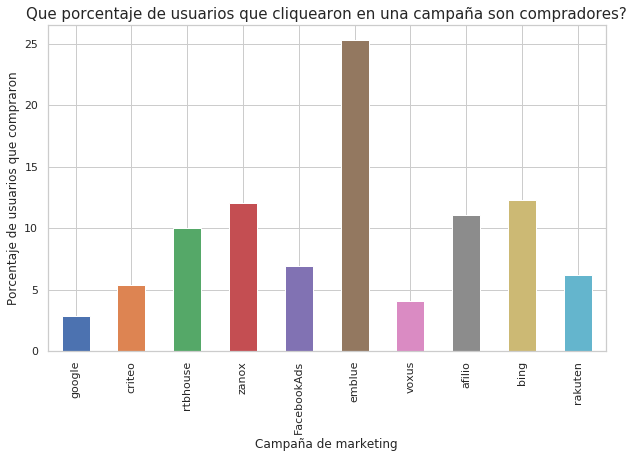

In [46]:
campaign_total_vs_compras.plot(kind='bar', x='campaign_source', y='porcentaje', legend=False,  figsize=(10,6))\
                    .set(ylabel='Porcentaje de usuarios que compraron',\
                    xlabel='Campaña de marketing')

plt.title('Que porcentaje de usuarios que cliquearon en una campaña son compradores?', fontsize=15);